In [5]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

import os

import neat
#import visualize

# 2-input XOR inputs and expected outputs.
xor_inputs = [(0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (1.0, 1.0)]
xor_outputs = [(0.0,), (1.0,), (1.0,), (0.0,)]


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = 4.0
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        for xi, xo in zip(xor_inputs, xor_outputs):
            output = net.activate(xi)
            genome.fitness -= (output[0] - xo[0]) ** 2


def run(config_file):
    # Load configuration.
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # Add a stdout reporter to show progress in the terminal.
    p.add_reporter(neat.StdOutReporter(True))
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)

    #saving checkpoints in a folder
    checkpoint_folder = "checkpoints"
    if not os.path.exists(checkpoint_folder):
        os.makedirs(checkpoint_folder)
    
    # Specify the path for checkpoints
    checkpoint_path = os.path.join(checkpoint_folder, "checkpoint-")
    
    # Create the Checkpointer with the desired configuration
    checkpointer = neat.Checkpointer(5, filename_prefix=checkpoint_path)
    
    # Add the checkpointer to the NEAT population
    p.add_reporter(checkpointer)

    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 300)

    # Display the winning genome.
    print('\nBest genome:\n{!s}'.format(winner))

    # Show output of the most fit genome against training data.
    print('\nOutput:')
    winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
    for xi, xo in zip(xor_inputs, xor_outputs):
        output = winner_net.activate(xi)
        print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))

    node_names = {-1: 'A', -2: 'B', 0: 'A XOR B'}
    #visualize.draw_net(config, winner, True, node_names=node_names)
    #visualize.draw_net(config, winner, True, node_names=node_names, prune_unused=True)
    #visualize.plot_stats(stats, ylog=False, view=True)
    #visualize.plot_species(stats, view=True)

    #p = neat.Checkpointer.restore_checkpoint('neat-checkpoint-4')
    #p.run(eval_genomes, 10)


if __name__ == '__main__':
    # Determine path to configuration file. This path manipulation is
    # here so that the script will run successfully regardless of the
    # current working directory.
    local_dir = os.path.dirname(os.path.realpath('__file__'))
    config_path = os.path.join(local_dir, 'config')
    run(config_path)


 ****** Running generation 0 ****** 

Population's average fitness: 2.22841 stdev: 0.29162
Best fitness: 2.96910 - size: (2, 2) - species 1 - id 36
Average adjusted fitness: 0.621
Mean genetic distance 1.971, standard deviation 0.491
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0   100      3.0    0.608     0
     2    0   150      2.9    0.633     0
Total extinctions: 0
Generation time: 0.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 2.36428 stdev: 0.34029
Best fitness: 2.99802 - size: (2, 2) - species 1 - id 446
Average adjusted fitness: 0.641
Mean genetic distance 1.794, standard deviation 0.482
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1   127      3.0    0.652     0
     2    1   123      3.0    0.630     0
Total extinctions: 0
Generation time: 0.022 sec (0.022 average)



KeyboardInterrupt: 

In [19]:
import gymnasium as gym
env = gym.make("CartPole-v1")
observation = env.reset()

print(observation)
print(env.action_space)

done = False
while not done:
    observation, reward, done, _, info = env.step(env.action_space.sample())
    print(env.action_space.sample())

(array([-0.00102027,  0.02969049,  0.01825756, -0.01427731], dtype=float32), {})
Discrete(2)
0
1
1
0
0
1
0
0
1
1
1
1
0
1
0
0


/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/e


 ****** Running generation 0 ****** 

Population's average fitness: 14.85040 stdev: 17.93593
Best fitness: 173.80000 - size: (1, 2) - species 2 - id 39
Average adjusted fitness: 0.039
Mean genetic distance 2.231, standard deviation 0.645
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    99    169.2    0.031     0
     2    0   151    173.8    0.047     0
Total extinctions: 0
Generation time: 0.471 sec

 ****** Running generation 1 ****** 

Population's average fitness: 29.09600 stdev: 32.71258
Best fitness: 212.80000 - size: (1, 2) - species 2 - id 331
Average adjusted fitness: 0.091
Mean genetic distance 2.162, standard deviation 0.553
Population of 250 members in 2 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    1    89    134.2    0.046     1
     2    1   161    212.8    0.136     0
Total extinctions: 0
Generation time: 0.403 sec (0.437 av

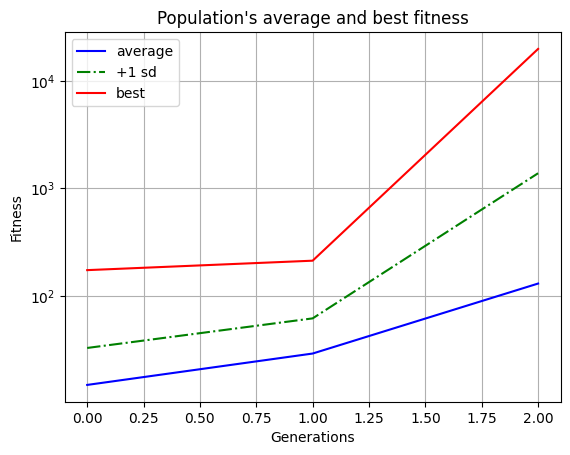

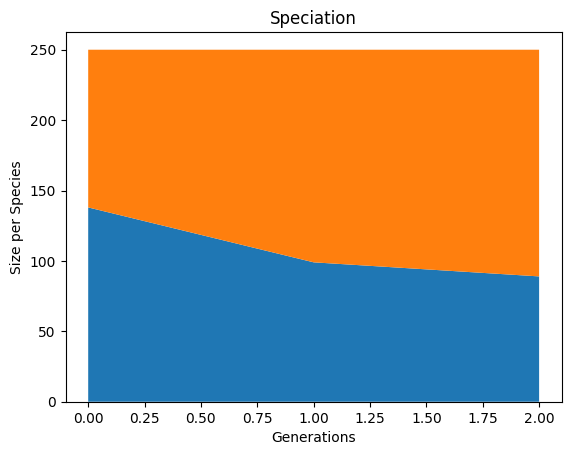


(eog:185959): EOG-CRITICAL **: 21:59:05.705: eog_image_get_file: assertion 'EOG_IS_IMAGE (img)' failed

(eog:185959): GLib-GIO-CRITICAL **: 21:59:05.705: g_file_equal: assertion 'G_IS_FILE (file1)' failed


In [3]:
"""
Single-pole balancing experiment using a feed-forward neural network.
"""

import multiprocessing
import os
import pickle

import cart_pole
import neat
import visualize
import gym
import numpy as np

runs_per_net = 5
simulation_seconds = 60.0



# Use the NN network phenotype and the discrete actuator force function.
def eval_genome(genome, config):

    net = neat.nn.FeedForwardNetwork.create(genome, config)

    fitnesses = []

    for runs in range(runs_per_net):
        env = gym.make("CartPole-v1")

        observation, _ = env.reset()
        #print(observation)
        fitness = 0.0
        done = False
        while not done:
            
            action = net.activate(observation)
            
            action =  int(np.round(action[0]))
            #print(action)
            observation, reward, done, _,  info = env.step(action)
            #print(reward)
            fitness += reward

        fitnesses.append(fitness)

    return np.mean(fitnesses)

    # The genome's fitness is its worst performance across all runs.
    #return min(fitnesses)


def eval_genomes(genomes, config):
    print("HELLO")
    for genome_id, genome in genomes:
        genome.fitness = eval_genome(genome, config)


def run():
    # Load the config file, which is assumed to live in
    # the same directory as this script.
    local_dir = os.path.dirname('__file__')
    config_path = os.path.join(local_dir, 'config')
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)
    
    pop = neat.Population(config)
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)
    pop.add_reporter(neat.StdOutReporter(True))

    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = pop.run(pe.evaluate)

    # Save the winner.
    with open('winner-feedforward', 'wb') as f:
        pickle.dump(winner, f)

    print(winner)

    visualize.plot_stats(stats, ylog=True, view=True, filename="feedforward-fitness.svg")
    visualize.plot_species(stats, view=True, filename="feedforward-speciation.svg")

    node_names = {-1: 'Cart Position', -2: 'Cart Velocity', -3: 'Pole Angle', -4: 'Pole Angular Velocity', 0: 'control'}
    visualize.draw_net(config, winner, True, node_names=node_names)

    visualize.draw_net(config, winner, view=True, node_names=node_names,
                       filename="winner-feedforward.gv")
    #visualize.draw_net(config, winner, view=True, node_names=node_names,
    #                   filename="winner-feedforward-enabled-pruned.gv", prune_unused=True)


if __name__ == '__main__':
    run()

In [ ]:
"""
Single-pole balancing experiment using a feed-forward neural network.
"""

import multiprocessing
import os
import pickle

import cart_pole
import neat
import visualize

runs_per_net = 5
simulation_seconds = 60.0


# Use the NN network phenotype and the discrete actuator force function.
def eval_genome(genome, config):
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    fitnesses = []

    for runs in range(runs_per_net):
        sim = cart_pole.CartPole()

        # Run the given simulation for up to num_steps time steps.
        fitness = 0.0
        while sim.t < simulation_seconds:
            inputs = sim.get_scaled_state()
            action = net.activate(inputs)

            # Apply action to the simulated cart-pole
            force = cart_pole.discrete_actuator_force(action)
            sim.step(force)

            # Stop if the network fails to keep the cart within the position or angle limits.
            # The per-run fitness is the number of time steps the network can balance the pole
            # without exceeding these limits.
            if abs(sim.x) >= sim.position_limit or abs(sim.theta) >= sim.angle_limit_radians:
                break

            fitness = sim.t

        fitnesses.append(fitness)

    # The genome's fitness is its worst performance across all runs.
    return min(fitnesses)


def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = eval_genome(genome, config)


def run():
    # Load the config file, which is assumed to live in
    # the same directory as this script.
    local_dir = os.path.dirname(__file__)
    config_path = os.path.join(local_dir, 'config-feedforward')
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)

    pop = neat.Population(config)
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)
    pop.add_reporter(neat.StdOutReporter(True))

    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)
    winner = pop.run(pe.evaluate)

    # Save the winner.
    with open('winner-feedforward', 'wb') as f:
        pickle.dump(winner, f)

    print(winner)

    visualize.plot_stats(stats, ylog=True, view=True, filename="feedforward-fitness.svg")
    visualize.plot_species(stats, view=True, filename="feedforward-speciation.svg")

    node_names = {-1: 'x', -2: 'dx', -3: 'theta', -4: 'dtheta', 0: 'control'}
    visualize.draw_net(config, winner, True, node_names=node_names)

    visualize.draw_net(config, winner, view=True, node_names=node_names,
                       filename="winner-feedforward.gv")
    visualize.draw_net(config, winner, view=True, node_names=node_names,
                       filename="winner-feedforward-enabled-pruned.gv", prune_unused=True)


if __name__ == '__main__':
    run()